# Trends from Annual U.S. Sexual Assault Data
*  This dataset contains sexual assault data compiled from the Yearly Crime Victimization Series. This data is from the Bureau of Justice Statistics (BJS); they provide official estimates of criminal victimizations reported and not reported to police in the U.S. from BJS's National Crime Victimization Survey. https://www.bjs.gov/index.cfm?ty=tp&tid=317

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
cases_by_crime_df= pd.read_csv('../data/clean/Annual_Num_Cases_by_Crime_13_to_19.csv')

In [3]:
cases_by_crime_df

,Type of Crime,2013,2014,2015,2016,2017,2018,2019
0,Total Violent crime,"6,126,420","5,359,570","5,006,620","5,353,820","5,612,670","6,385,520","5,813,410"
1,Rape/sexual assault,"300,170","284,350","431,840","298,410","393,980","734,630","459,310"
2,Robbery,"645,650","664,210","578,580","458,810","613,840","573,100","534,420"
3,Total Assault,"5,180,610","4,411,010","3,996,200","4,596,600","4,604,850","5,077,790","4,819,680"
4,Aggravated assault,"994,220","1,092,090","816,760","1,040,580","993,170","1,058,040","1,019,490"
5,Simple assault,"4,186,390","3,318,920","3,179,440","3,556,020","3,611,680","4,019,750","3,800,190"
6,Violent crime excluding simple assault/d,"1,940,030","2,040,650","1,827,170","1,797,790","2,000,990","2,365,770","2,013,220"


### How has the number of rape/sexual assault victims changed since 2013?
1. Create a new dataframe from cases_by_crime_df by using a dictionary
2. Drop the first row 
3. Set year as the index
4. Convert values in numbers column into numerical values
5. Drop extra 'index' and 'year' column
6. Rename column to victims_count
7. Create a line plot 

In [4]:
data = {'year': cases_by_crime_df.columns, 'numbers': cases_by_crime_df.iloc[1]}
assault_df = pd.DataFrame(data)
assault_df = assault_df[1:].reset_index()
assault_df = assault_df.set_index(assault_df['year'])
assault_df.year = assault_df.year.astype(float)
assault_df.numbers = assault_df.numbers.str.replace(",", "").astype(float)
assault_df.drop(assault_df.columns[0], axis=1)
assault_df = assault_df.drop(columns=['index', 'year'])
assault_df.columns = ['victims_count']
assault_df 

,victims_count
year,
2013,300170.0
2014,284350.0
2015,431840.0
2016,298410.0
2017,393980.0
2018,734630.0
2019,459310.0


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Number of Rape/Sexual Assault Victims in the U.S. from 2013-2019')

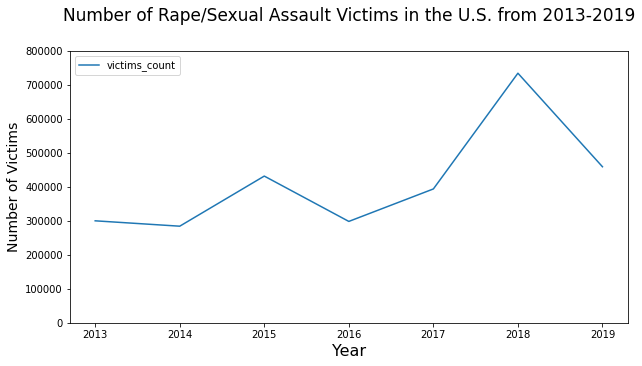

In [5]:
assault_df.plot(kind='line', figsize=(10, 5))
plt.ylim(0,800000)
plt.xlabel('Year', size=16)
plt.ylabel('Number of Victims', size=14)
plt.title('Number of Rape/Sexual Assault Victims in the U.S. from 2013-2019', size=17, pad=30)

Overall, there has been an increase in rape/sexual assault victims since 2013. **There was also a peak in rape/sexual assault victims in 2018.**

### How has the percentage of rape/sexual assault victims that reported changed since 2013?
1. Create a new data frame from cases_by_crime_df by using a dictionary
2. Drop the first row 
3. Set year as the index
4. Convert values in numbers column into numerical values
5. Drop extra 'index' and 'year' column
6. Rename column to perc_reported
7. Create a line plot 

In [6]:
perc_reported_by_crime_df= pd.read_csv('../data/clean/Annual_Perc_of_Reported_Crimes_13_to_19.csv')

In [7]:
perc_reported_by_crime_df

,Type of crime,2013,2014,2015,2016,2017,2018,2019
0,Total Violent crime,45.6,46.0,46.5,43.9,44.9,42.6,40.9
1,Rape/sexual assault,35.0,33.6,32.5,23.2,40.4,24.9,33.9
2,Robbery,68.0,60.9,61.9,57.0,49.0,62.6,46.6
3,Total Assault,43.0,44.6,45.8,43.9,44.7,43.0,40.9
4,Aggravated assault,64.0,58.4,61.9,59.8,57.2,60.5,52.1
5,Simple assault,39.0,40.0,41.7,39.3,41.3,38.4,37.9
6,Violent crime excluding simple assault/d,61.0,55.8,54.9,53.0,51.4,49.9,46.5


In [8]:
data2 = {'year': perc_reported_by_crime_df.columns, 'numbers': perc_reported_by_crime_df.iloc[1]}
reported_df = pd.DataFrame(data2)
reported_df = reported_df[1:].reset_index()
reported_df = reported_df.set_index(reported_df['year'])
reported_df.year = reported_df.year.astype(float)
reported_df.numbers = reported_df.numbers.astype(float)
reported_df.drop(reported_df.columns[0], axis=1)
reported_df = reported_df.drop(columns=['index', 'year'])
reported_df.columns = ['perc_reported']
reported_df

,perc_reported
year,
2013,35.0
2014,33.6
2015,32.5
2016,23.2
2017,40.4
2018,24.9
2019,33.9


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Percentage of Rape/Sexual Assault Cases Reported to Police in the U.S. from 2013-2019')

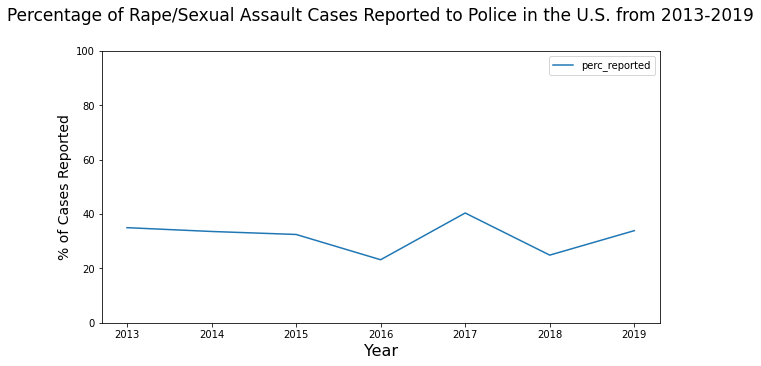

In [9]:
reported_df.plot(kind='line', figsize=(10, 5))
plt.ylim(0,100)
plt.xlabel('Year', size=16)
plt.ylabel('% of Cases Reported', size=14)
plt.title('Percentage of Rape/Sexual Assault Cases Reported to Police in the U.S. from 2013-2019', size=17, pad=30)

**The percent of reported sexual assault cases have stayed at relatively low levels since 2013.** There was a slight peak in 2017.

### How has the percentage of rape/sexual assault victims that did not report change since 2013?
1. Create a new unreported column by subtracting 100 by the percentage of reported 
2. Drop the reported column and create a new dataframe

In [10]:
reported_df['perc_unreported'] = 100 - (reported_df['perc_reported'])
unreported_df= reported_df.drop(columns=['perc_reported'])
unreported_df

,perc_unreported
year,
2013,65.0
2014,66.4
2015,67.5
2016,76.8
2017,59.6
2018,75.1
2019,66.1


Text(0.5, 1.0, 'Percentage of Rape/Sexual Assault Cases NOT Reported to Police in the U.S. from 2013-2019')

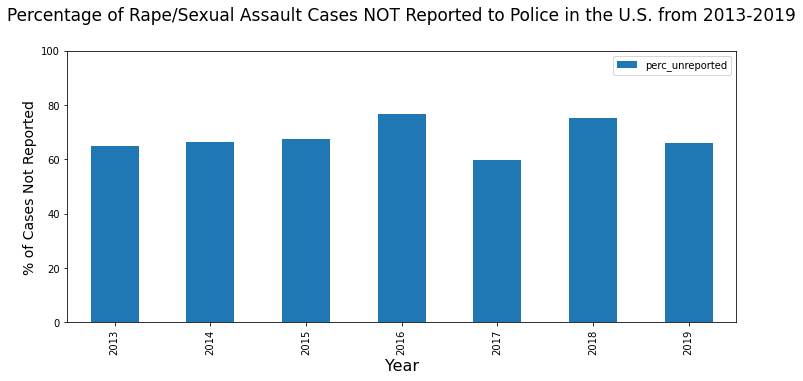

In [11]:
unreported_df.plot(kind='bar', figsize=(12, 5))
plt.ylim(0,100)
plt.xlabel('Year', size=16)
plt.ylabel('% of Cases Not Reported', size=14)
plt.title('Percentage of Rape/Sexual Assault Cases NOT Reported to Police in the U.S. from 2013-2019', size=17, pad=30)

There has consistently been high percentages of rape/sexual assault victims who did not report their case to the police since 2013. **There are peaks in 2016 and 2018, where about 75% of victims of rape/sexual assault did not report their case.**